In [1]:
import pandas as pd
import random as rd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
from sklearn.utils import shuffle
%matplotlib inline

## DATA PREPROCESSING

In [2]:
df = pd.read_csv("C:/Users/goura/Desktop/Loan_Default_Classification/accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv")

C:\Users\goura\AppData\Local\Temp\ipykernel_14572\2255243340.py:1: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/Users/goura/Desktop/Loan_Default_Classification/accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv")


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB


REMOVING UNNECESSARY COLUMN

In [4]:
columns_to_drop = ['id', 'member_id', 'url', 'desc', 'title', 'zip_code', 'pymnt_plan', 
                   'next_pymnt_d', 'initial_list_status', 'policy_code', 'mths_since_last_record', 
                   'mths_since_last_delinq', 'mths_since_last_major_derog', 'last_fico_range_low', 
                   'last_fico_range_high', 'hardship_flag', 'hardship_type', 'hardship_reason', 
                   'hardship_status', 'deferral_term', 'hardship_amount', 'hardship_start_date', 
                   'hardship_end_date', 'payment_plan_start_date', 'hardship_length', 'hardship_dpd', 
                   'hardship_loan_status', 'orig_projected_additional_accrued_interest', 
                   'hardship_payoff_balance_amount', 'hardship_last_payment_amount', 'disbursement_method', 
                   'debt_settlement_flag', 'debt_settlement_flag_date', 'settlement_status', 'settlement_date', 
                   'settlement_amount', 'settlement_percentage', 'settlement_term']
df_cleaned = df.drop(columns=columns_to_drop)

REMOVING COLUMN BECAUSE OF NULL VALUE

In [5]:
drop_null_column = ['funded_amnt_inv', 'total_bal_il', 'emp_title', 'issue_d', 'addr_state', 'out_prncp_inv', 'total_pymnt_inv', 'total_rec_late_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit', 'sec_app_mths_since_last_major_derog',  'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'sec_app_collections_12_mths_ex_med', 'sec_app_chargeoff_within_12_mths', 'sec_app_num_rev_accts', 'sec_app_open_act_il', 'sec_app_revol_util', 'sec_app_open_acc', 'sec_app_mort_acc', 'sec_app_inq_last_6mths', 'sec_app_earliest_cr_line', 'sec_app_fico_range_high', 'sec_app_fico_range_low', 'revol_bal_joint', 'mths_since_rcnt_il', 'il_util', 'mths_since_recent_bc_dlq', 'mths_since_recent_revol_delinq']
cleaned = df_cleaned.drop(columns=drop_null_column)

In [6]:
low_missing_columns = [
    'loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 
    'home_ownership', 'annual_inc', 'verification_status', 'loan_status', 
    'fico_range_low', 'fico_range_high', 'revol_bal', 'out_prncp', 'total_pymnt', 
    'total_rec_prncp', 'total_rec_int', 'recoveries', 'collection_recovery_fee', 'application_type', 'delinq_2yrs', 'open_acc', 'inq_last_6mths', 'pub_rec', 'total_acc', 'collections_12_mths_ex_med', 'acc_now_delinq', 'tax_liens'
]
df_cleaned = cleaned.dropna(subset=low_missing_columns)

In [7]:
df_cleaned['dti'] = df_cleaned['dti'].fillna(df_cleaned['dti'].median())
df_cleaned['revol_util'] = df_cleaned['revol_util'].fillna(df_cleaned['revol_util'].median())
df_cleaned['pub_rec_bankruptcies'] = df_cleaned['pub_rec_bankruptcies'].fillna(df_cleaned['pub_rec_bankruptcies'].median())
df_cleaned['tot_coll_amt'] = df_cleaned['tot_coll_amt'].fillna(df_cleaned['tot_coll_amt'].median())
df_cleaned['tot_cur_bal'] = df_cleaned['tot_cur_bal'].fillna(df_cleaned['tot_cur_bal'].median())
df_cleaned['total_rev_hi_lim'] = df_cleaned['total_rev_hi_lim'].fillna(df_cleaned['total_rev_hi_lim'].median())
df_cleaned['num_tl_op_past_12m'] = df_cleaned['num_tl_op_past_12m'].fillna(df_cleaned['num_tl_op_past_12m'].median())
df_cleaned['pct_tl_nvr_dlq'] = df_cleaned['pct_tl_nvr_dlq'].fillna(df_cleaned['pct_tl_nvr_dlq'].median())
df_cleaned['emp_length'] = df_cleaned['emp_length'].fillna(df_cleaned['emp_length'].mode())
df_cleaned['purpose'] = df_cleaned['purpose'].fillna(df_cleaned['purpose'].mode())

C:\Users\goura\AppData\Local\Temp\ipykernel_14572\3127002921.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['dti'] = df_cleaned['dti'].fillna(df_cleaned['dti'].median())
C:\Users\goura\AppData\Local\Temp\ipykernel_14572\3127002921.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['revol_util'] = df_cleaned['revol_util'].fillna(df_cleaned['revol_util'].median())
C:\Users\goura\AppData\Local\Temp\ipykernel_14572\3127002921.py:3: SettingWithCopyWarning: 
A value is trying to be set

In [8]:
df_cleaned['emp_length'].fillna(df_cleaned['emp_length'].mode()[0], inplace=True)

C:\Users\goura\AppData\Local\Temp\ipykernel_14572\4248550444.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['emp_length'].fillna(df_cleaned['emp_length'].mode()[0], inplace=True)
C:\Users\goura\AppData\Local\Temp\ipykernel_14572\4248550444.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['emp_length'].fillna(df_cl

In [9]:
emp_length_mapping = {
    '< 1 year': 0.5,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10
}
df_cleaned['emp_length'] = df_cleaned['emp_length'].map(emp_length_mapping)
df_cleaned['emp_length'].fillna(df_cleaned['emp_length'].median(), inplace=True)

C:\Users\goura\AppData\Local\Temp\ipykernel_14572\1118833201.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['emp_length'] = df_cleaned['emp_length'].map(emp_length_mapping)
C:\Users\goura\AppData\Local\Temp\ipykernel_14572\1118833201.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the origi

In [10]:
home_ownership_mapping = {
    'MORTGAGE':0,
    'RENT':1,
    'OWN':2,
    'OTHER':3,
    'ANY':4,
    'NONE':5
}
df_cleaned['home_ownership'] = df_cleaned['home_ownership'].map(home_ownership_mapping)
# df_cleaned['home_ownership'] = df_cleaned['home_ownership'].fillna(df_cleaned['home_ownership'].mode())

C:\Users\goura\AppData\Local\Temp\ipykernel_14572\3905933245.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['home_ownership'] = df_cleaned['home_ownership'].map(home_ownership_mapping)


In [11]:
df_cleaned.isnull().sum()

loan_amnt                     0
funded_amnt                   0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
loan_status                   0
purpose                       0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
fico_range_low                0
fico_range_high               0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
out_prncp                     0
total_pymnt                   0
total_rec_prncp               0
total_rec_int                 0
recoveries                    0
collection_recovery_fee       0
collections_12_mths_ex_med    0
applicat

In [12]:
df_cleaned['home_ownership']

0          0
1          0
2          0
3          0
4          0
          ..
2260694    0
2260695    0
2260696    0
2260697    1
2260698    0
Name: home_ownership, Length: 2260522, dtype: int64

In [13]:
verification_status_mapping = {
    'Not Verified':0,
    'Source Verified':1,
    'Verified':2
}
df_cleaned['verification_status'] = df_cleaned['verification_status'].map(verification_status_mapping)

C:\Users\goura\AppData\Local\Temp\ipykernel_14572\49829525.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['verification_status'] = df_cleaned['verification_status'].map(verification_status_mapping)


In [14]:
loan_status_mapping = {
    'Fully Paid': 0,
    'Current': 0,
    'Charged Off': 1,
    'In Grace Period': 1,
    'Late (31-120 days)': 1,
    'Late (16-30 days)': 1,
    'Default': 1,
    'Does not meet the credit policy. Status:Fully Paid': 0,
    'Does not meet the credit policy. Status:Charged Off': 1
}
df_cleaned['loan_status'] = df_cleaned['loan_status'].map(loan_status_mapping)

C:\Users\goura\AppData\Local\Temp\ipykernel_14572\867387072.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['loan_status'] = df_cleaned['loan_status'].map(loan_status_mapping)


In [15]:
application_type_mapping = {
    'Individual':0,
    'Joint App':1
}
df_cleaned['application_type'] = df_cleaned['application_type'].map(application_type_mapping)

C:\Users\goura\AppData\Local\Temp\ipykernel_14572\2094341301.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['application_type'] = df_cleaned['application_type'].map(application_type_mapping)


In [16]:
df_cleaned['term'] = df_cleaned['term'].str.strip()
term_mapping = {
    '60 months':0,
    '36 months':1
}
df_cleaned['term'] = df_cleaned['term'].map(term_mapping)

C:\Users\goura\AppData\Local\Temp\ipykernel_14572\1804118674.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['term'] = df_cleaned['term'].str.strip()
C:\Users\goura\AppData\Local\Temp\ipykernel_14572\1804118674.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['term'] = df_cleaned['term'].map(term_mapping)


In [17]:
purpose_mapping = {
    'debt_consolidation': 0,
    'small_business': 1,
    'home_improvement': 2,
    'major_purchase': 3,
    'credit_card': 4,
    'other': 5,
    'house': 6,
    'vacation': 7,
    'car': 8,
    'medical': 9,
    'moving': 10,
    'renewable_energy': 11,
    'wedding': 12,
    'educational': 13
}
df_cleaned['purpose'] = df_cleaned['purpose'].map(purpose_mapping)

C:\Users\goura\AppData\Local\Temp\ipykernel_14572\313361140.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['purpose'] = df_cleaned['purpose'].map(purpose_mapping)


In [18]:
# A>B>C>D>E>F
grade_mapping = {
    'A': 0,
    'B': 1,
    'C': 2,
    'D': 3,
    'E': 4,
    'F': 5,
    'G': 6
}
df_cleaned['grade'] = df_cleaned['grade'].map(grade_mapping)

C:\Users\goura\AppData\Local\Temp\ipykernel_14572\1855757074.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['grade'] = df_cleaned['grade'].map(grade_mapping)


In [19]:
sub_grade_order = ['A1', 'A2', 'A3', 'A4', 'A5', 
                   'B1', 'B2', 'B3', 'B4', 'B5', 
                   'C1', 'C2', 'C3', 'C4', 'C5', 
                   'D1', 'D2', 'D3', 'D4', 'D5', 
                   'E1', 'E2', 'E3', 'E4', 'E5', 
                   'F1', 'F2', 'F3', 'F4', 'F5', 
                   'G1', 'G2', 'G3', 'G4', 'G5']
sub_grade_mapping = {sub_grade: i for i, sub_grade in enumerate(sub_grade_order)}
df_cleaned['sub_grade'] = df_cleaned['sub_grade'].map(sub_grade_mapping)

C:\Users\goura\AppData\Local\Temp\ipykernel_14572\4121050966.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['sub_grade'] = df_cleaned['sub_grade'].map(sub_grade_mapping)


In [20]:
df_cleaned['earliest_cr_line'] = pd.to_datetime(df_cleaned['earliest_cr_line'], errors='coerce')
df_cleaned['credit_history_length'] = datetime.now().year - df_cleaned['earliest_cr_line'].dt.year

C:\Users\goura\AppData\Local\Temp\ipykernel_14572\4136854587.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_cleaned['earliest_cr_line'] = pd.to_datetime(df_cleaned['earliest_cr_line'], errors='coerce')
C:\Users\goura\AppData\Local\Temp\ipykernel_14572\4136854587.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['earliest_cr_line'] = pd.to_datetime(df_cleaned['earliest_cr_line'], errors='coerce')
C:\Users\goura\AppData\Local\Temp\ipykernel_14572\4136854587.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [21]:
if 'earliest_cr_line' in df_cleaned.columns:
    # Convert 'earliest_cr_line' to the number of years since the earliest credit line
    df_cleaned['credit_history_length'] = (pd.to_datetime('today') - pd.to_datetime(df_cleaned['earliest_cr_line'])).dt.days / 365
    # Now drop the original 'earliest_cr_line' column since we have derived a numeric feature from it
    df_cleaned = df_cleaned.drop(columns=['earliest_cr_line'])

C:\Users\goura\AppData\Local\Temp\ipykernel_14572\2400239070.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['credit_history_length'] = (pd.to_datetime('today') - pd.to_datetime(df_cleaned['earliest_cr_line'])).dt.days / 365


In [22]:
data=df_cleaned.sample(frac=.5,random_state=101)

# DATA SPLITTING

In [23]:
# Import necessary libraries
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame
# Separate the feature set (X) and the target/label (y)
X = df_cleaned.drop(columns=['loan_status'])  # Drop 'loan_status' from the feature set
y = df_cleaned['loan_status']  # 'loan_status' as the target

# Perform train-test split (80% train, 20% test by default)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (1582365, 39)
X_test shape: (678157, 39)
y_train shape: (1582365,)
y_test shape: (678157,)


In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# LOGISTIC REGRESSION

In [25]:
# from sklearn.linear_model import LogisticRegression

# lr = LogisticRegression(solver='saga',penalty='l1', C=0.5,  max_iter=200, class_weight='balanced', random_state=42)
# lr.fit(X_train_scaled, y_train)
# y_pred = lr.predict(X_test_scaled)
# y_pred_proba = lr.predict_proba(X_test_scaled)[:, 1]
# print("Logistic Regression with Imputer:")
# print(classification_report(y_test, y_pred))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
# print("AUC:", roc_auc_score(y_test, y_pred_proba))


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

lr = LogisticRegression(max_iter=200, class_weight='balanced', random_state=42)
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)
y_pred_proba = lr.predict_proba(X_test_scaled)[:, 1]
print("Logistic Regression with Imputer:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred_proba))


Logistic Regression with Imputer:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99    587279
           1       0.95      0.88      0.91     90878

    accuracy                           0.98    678157
   macro avg       0.97      0.94      0.95    678157
weighted avg       0.98      0.98      0.98    678157

Confusion Matrix:
 [[583081   4198]
 [ 10846  80032]]
AUC: 0.9755698063302447


C:\Users\goura\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\goura\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Accuracy: 97.20
Precision: 1.00
Recall: 0.79
F1-Score: 0.88
AUC-ROC: 0.90
Confusion Matrix:
[[587259     20]
 [ 18988  71890]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98    587279
           1       1.00      0.79      0.88     90878

    accuracy                           0.97    678157
   macro avg       0.98      0.90      0.93    678157
weighted avg       0.97      0.97      0.97    678157



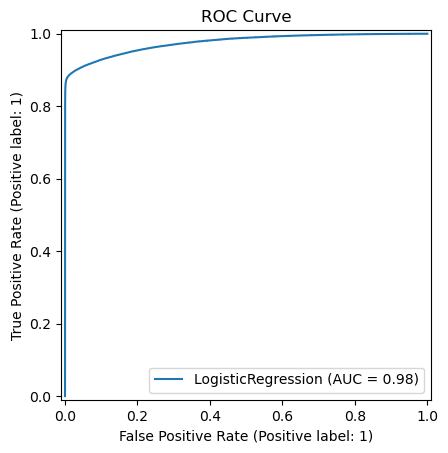

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

# Predict class labels and probabilities
y_pred = lr.predict(X_test)
y_pred_proba = lr.predict_proba(X_test)[:, 1]  # Probability of the positive class

# 1. Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}")

# 2. Precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")

# 3. Recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")

# 4. F1-Score
f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1:.2f}")

# 5. AUC-ROC
auc_roc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC-ROC: {auc_roc:.2f}")

# 6. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plotting the ROC curve
RocCurveDisplay.from_estimator(lr, X_test_scaled, y_test)
plt.title("ROC Curve")
plt.show()


In [ ]:
# from sklearn.pipeline import Pipeline
# from sklearn.impute import SimpleImputer
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
# pipeline = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='mean')),
#     ('logistic', LogisticRegression(class_weight='balanced', random_state=42))
# ])
# pipeline.fit(X_train, y_train)
# y_pred = pipeline.predict(X_test)
# y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
# print("Logistic Regression with Imputer:")
# print(classification_report(y_test, y_pred))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
# print("AUC:", roc_auc_score(y_test, y_pred_proba))


# DECISSION TREE

In [30]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(max_depth=5, class_weight='balanced', random_state=42)
tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)
y_pred_proba = tree_model.predict_proba(X_test)[:, 1]
print("Decision Tree:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred_proba))


Decision Tree:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97    587279
           1       0.80      0.85      0.83     90878

    accuracy                           0.95    678157
   macro avg       0.89      0.91      0.90    678157
weighted avg       0.95      0.95      0.95    678157

Confusion Matrix:
 [[568059  19220]
 [ 13333  77545]]
AUC: 0.9586000043999164


Accuracy: 95.20
Precision: 0.80
Recall: 0.85
F1-Score: 0.83
AUC-ROC: 0.96
Confusion Matrix:
[[568059  19220]
 [ 13333  77545]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97    587279
           1       0.80      0.85      0.83     90878

    accuracy                           0.95    678157
   macro avg       0.89      0.91      0.90    678157
weighted avg       0.95      0.95      0.95    678157



C:\Users\goura\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


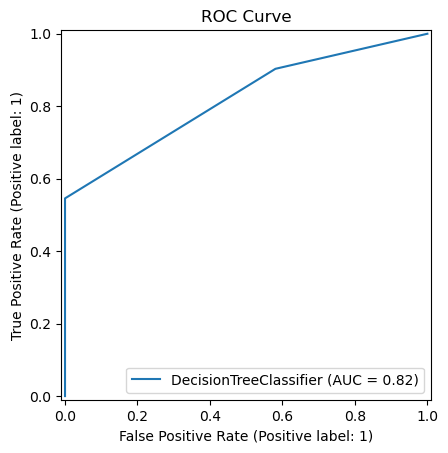

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

# Predict class labels and probabilities
y_pred = tree_model.predict(X_test)
y_pred_proba = tree_model.predict_proba(X_test)[:, 1]  # Probability of the positive class

# 1. Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}")

# 2. Precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")

# 3. Recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")

# 4. F1-Score
f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1:.2f}")

# 5. AUC-ROC
auc_roc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC-ROC: {auc_roc:.2f}")

# 6. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plotting the ROC curve
RocCurveDisplay.from_estimator(tree_model, X_test_scaled, y_test)
plt.title("ROC Curve")
plt.show()


# RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and fit the model
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train_scaled, y_train)


y_pred = rf_model.predict(X_test_scaled)
y_pred_proba = rf_model.predict_proba(X_test_scaled)[:, 1]

print("Random Forest:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred_proba))


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

# Predict class labels and probabilities
y_pred = rf_model.predict(X_test_scaled)
y_pred_proba = rf_model.predict_proba(X_test_scaled)[:, 1]  # Probability of the positive class

# 1. Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}")

# 2. Precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")

# 3. Recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")

# 4. F1-Score
f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1:.2f}")

# 5. AUC-ROC
auc_roc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC-ROC: {auc_roc:.2f}")

# 6. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plotting the ROC curve
RocCurveDisplay.from_estimator(rf_model, X_test_scaled, y_test)
plt.title("ROC Curve")
plt.show()


# XGBOOST

In [ ]:
from xgboost import XGBClassifier

# Initialize and fit the model
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, scale_pos_weight=10, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = xgb_model.predict(X_test_scaled)
y_pred_proba = xgb_model.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print("XGBoost:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred_proba))


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

# Predict class labels and probabilities
y_pred = xgb_model.predict(X_test_scaled)
y_pred_proba = xgb_model.predict_proba(X_test_scaled)[:, 1]  # Probability of the positive class

# 1. Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}")

# 2. Precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")

# 3. Recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")

# 4. F1-Score
f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1:.2f}")

# 5. AUC-ROC
auc_roc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC-ROC: {auc_roc:.2f}")

# 6. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plotting the ROC curve
RocCurveDisplay.from_estimator(pipeline, X_test_scaled, y_test)
plt.title("ROC Curve")
plt.show()


In [ ]:
# from sklearn.linear_model import LogisticRegression

# model = LogisticRegression(max_iter=200, class_weight='balanced', random_state=42)
# model.fit(X_train_scaled, y_train)


In [ ]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import Pipeline

# pipeline = Pipeline([
#     ('scaler', StandardScaler()),
#     ('logistic', LogisticRegression(max_iter=200, class_weight='balanced', random_state=42))
# ])

# pipeline.fit(X_train_scaled, y_train)


In [ ]:
# model = LogisticRegression(solver='saga',penalty='l1', C=0.5,  max_iter=200, class_weight='balanced', random_state=42)
# model.fit(X_train_scaled, y_train)


In [ ]:
# from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, auc

# # Assuming this is a binary classifier and predict() gives probabilities
# predict_prob = pipeline.predict(X_test)

# # Convert probabilities to binary class labels (0 or 1) using threshold of 0.5
# predict = (predict_prob >= 0.5).astype(int)

# # Now pass the binary predictions to the classification metrics
# print(classification_report(y_test, predict))
# print("Confusion Matrix:\n", confusion_matrix(y_test, predict))

# # Calculate ROC curve and AUC score
# fpr, tpr, thresholds = roc_curve(y_test, predict_prob)
# roc_auc = auc(fpr, tpr)
# print("AUC:", roc_auc)

# # Optionally, plot the ROC curve
# import matplotlib.pyplot as plt

# plt.figure()
# plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
# plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC)')
# plt.legend(loc="lower right")
# plt.show()


In [ ]:
# from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, auc

# # Assuming this is a binary classifier and predict() gives probabilities
# predict_prob = model.predict(X_test_scaled)

# # Convert probabilities to binary class labels (0 or 1) using threshold of 0.5
# predict = (predict_prob >= 0.5).astype(int)

# # Now pass the binary predictions to the classification metrics
# print(classification_report(y_test, predict))
# print("Confusion Matrix:\n", confusion_matrix(y_test, predict))

# # Calculate ROC curve and AUC score
# fpr, tpr, thresholds = roc_curve(y_test, predict_prob)
# roc_auc = auc(fpr, tpr)
# print("AUC:", roc_auc)

# # Optionally, plot the ROC curve
# import matplotlib.pyplot as plt

# plt.figure()
# plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
# plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC)')
# plt.legend(loc="lower right")
# plt.show()
